In [1]:
#Setting up any and all dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

#Reading CSV files 
payroll_df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")
budget_df = pd.read_csv("Expense_Budget.csv")
budget_df.head()

#Code for setting up API as well
#url = "https://data.ny.gov/resource/k397-673e.json"
#payroll_df = requests.get(url).json()
#payroll_df =pd.DataFrame(payroll_df)
#payroll_df


,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,...,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
0,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,9750.0,8950.0,9750.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,4500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,15390.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
#Check out how many agencies are in this file
num_of_agencies = budget_df["Agency Name"].nunique()
num_of_agencies = budget_df["Agency Name"].value_counts()

In [3]:
#Agency budgets by year; Create a table that shows each agency's budget by year (2017, 2018, 2019)  

#Group agencies by year (2017, 2018, 2019)
agencies_2017 = budget_df.loc[budget_df["Fiscal Year"] == 2017].groupby("Agency Name")
agencies_2018 = budget_df.loc[budget_df["Fiscal Year"] == 2018].groupby("Agency Name")
agencies_2019 = budget_df.loc[budget_df["Fiscal Year"] == 2019].groupby("Agency Name")

#Sum up each agency's budget by year
budget_2017 = pd.DataFrame(agencies_2017["Current Modified Budget Amount"].sum())
budget_2018 = pd.DataFrame(agencies_2018["Current Modified Budget Amount"].sum())
budget_2019 = pd.DataFrame(agencies_2019["Current Modified Budget Amount"].sum())

#Merge into one dataframe
budget_by_year = pd.merge(budget_2017, budget_2018, on="Agency Name")
budget_by_year = pd.merge(budget_by_year, budget_2019, on="Agency Name")
budget_by_year.columns = ["2017", "2018", "2019"]

budget_by_year = budget_by_year.sort_values(by=["2017"], ascending=False)
budget_by_year.head()

,2017,2018,2019
Agency Name,,,
DEPARTMENT OF EDUCATION,4.421820e+10,7.001744e+10,7.379264e+10
DEPARTMENT OF SOCIAL SERVICES,1.906238e+10,2.910364e+10,2.975823e+10
MISCELLANEOUS,1.893024e+10,2.912227e+10,2.980799e+10
PENSION CONTRIBUTIONS,1.862823e+10,2.823016e+10,2.879398e+10
POLICE DEPARTMENT,1.103449e+10,1.658441e+10,1.743227e+10


In [5]:
#Reverse rows to get top 15 in descending order to barh chart
row = budget_by_year.iloc[0:15]
row2 = row.iloc[::-1]
print(row)

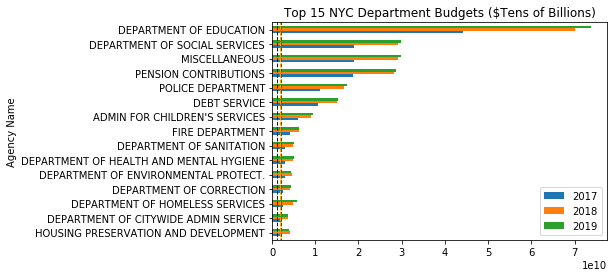

In [7]:
#Caluclate annual averages
avg_budget_2017 = budget_by_year["2017"].mean()
avg_budget_2018 = budget_by_year["2018"].mean()
avg_budget_2019 = budget_by_year["2019"].mean()

# Generate the Plot
row2.plot(kind='barh')
plt.title("Top 15 NYC Department Budgets ($Tens of Billions)")
plt.plot([avg_budget_2017, avg_budget_2017],[-1,15], linestyle='--', lw=1, color='blue')
plt.plot([avg_budget_2018, avg_budget_2018],[-1,15], linestyle='--', lw=1, color='orange')
plt.plot([avg_budget_2019, avg_budget_2019],[-1,15], linestyle='--', lw=1, color='green')
#plt.show()

# Save the Figure
plt.savefig("Agency_Budget_by_Year.png")

In [24]:
#See what's going on w/ misc. 
misc_budget_df = pd.read_csv("Expense_Budget.csv", index_col ="Agency Name")
misc_df = misc_budget_df.loc[["MISCELLANEOUS"]] 

misc_df.head()

misc_spending = misc_df["Budget Code Name"].value_counts()


In [14]:
#Agency budgets by year; Create a table that shows each agency's budget by year (2017, 2018, 2019)  

#Group agencies by year (2017, 2018, 2019)
misc_2017 = misc_df.loc[misc_df["Fiscal Year"] == 2017].groupby("Budget Code Name")
misc_2018 = misc_df.loc[misc_df["Fiscal Year"] == 2018].groupby("Budget Code Name")
misc_2019 = misc_df.loc[misc_df["Fiscal Year"] == 2019].groupby("Budget Code Name")

#Sum up each agency's budget by year
misc_budget_2017 = pd.DataFrame(misc_2017["Current Modified Budget Amount"].sum())
misc_budget_2018 = pd.DataFrame(misc_2018["Current Modified Budget Amount"].sum())
misc_budget_2019 = pd.DataFrame(misc_2019["Current Modified Budget Amount"].sum())

#budget_by_year.columns = ["2017", "2018", "2019"]

misc_budget_2017 = misc_budget_2017.sort_values(by=["Current Modified Budget Amount"], ascending=False)
misc_budget_2018 = misc_budget_2018.sort_values(by=["Current Modified Budget Amount"], ascending=False)
misc_budget_2019 = misc_budget_2019.sort_values(by=["Current Modified Budget Amount"], ascending=False)

,Current Modified Budget Amount
Budget Code Name,
FRINGE BENEFITS,7.246929e+09
RETIREE HEALTH BENEFITS TRUST,3.829307e+09
SPECIAL RESERVES,1.849186e+09
STATE BUILDING AID,1.210082e+09
PERSONAL SERVICES,1.209175e+09


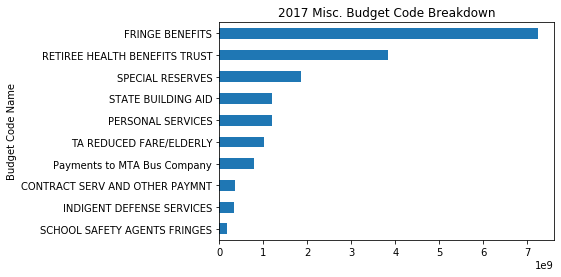

In [23]:
row = misc_budget_2017.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.title("2017 Misc. Budget Code Breakdown")
plt.savefig("2017_Misc_Budget.png")

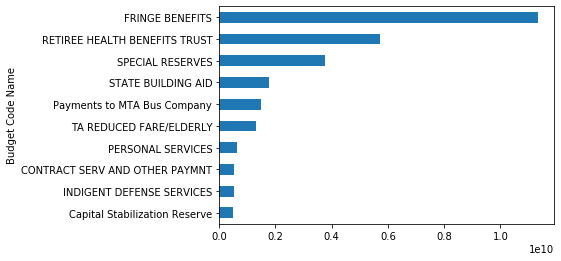

In [20]:
row = misc_budget_2018.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.show()

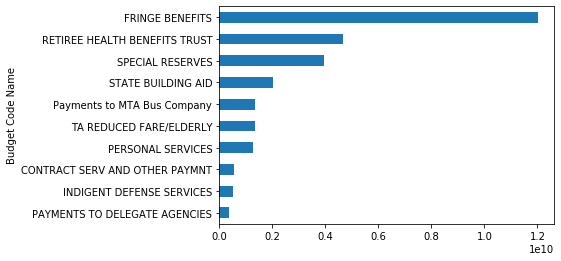

In [21]:
row = misc_budget_2019.iloc[0:10].iloc[::-1]
row.plot(kind='barh', legend=False)
plt.show()

In [154]:
from fuzzywuzzy import fuzz

In [155]:
Payroll_df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv", low_memory=False)
Payroll_df.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,1830.00,$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,1831.00,$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,1181.68,$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,1831.00,$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00


In [156]:
#normalizing Agency Names

Payroll_df["Used Agency Name"] = [x.strip() for x in Payroll_df["Agency Name"]]
Payroll_df["Used Agency Name"] = [x.upper() for x in Payroll_df["Used Agency Name"]]


In [148]:
Payroll_df["Fiscal Year"].value_counts()

2015    577880
2017    562266
2016    544817
2014    509525
Name: Fiscal Year, dtype: int64

In [153]:
#2017 only payroll data
payroll_2017 = Payroll_df.loc[Payroll_df["Fiscal Year"] == 2017]
payroll_2017.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Used Agency Name
1632222,2017,ADMIN FOR CHILDREN'S SVCS,AARON,TERESA,NaN,03/21/2016,BRONX,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$51315.00,per Annum,1825.00,$51709.59,588.00,$22374.31,$639.66,ADMIN FOR CHILDREN'S SVCS
1632223,2017,ADMIN FOR CHILDREN'S SVCS,AARONS,CAMELIA,M,08/08/2016,BROOKLYN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$51315.00,per Annum,1595.55,$41960.18,121.75,$3892.19,$108.25,ADMIN FOR CHILDREN'S SVCS
1632224,2017,ADMIN FOR CHILDREN'S SVCS,ABDUL,MODUPE,NaN,02/11/2008,BROOKLYN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$54720.00,per Annum,1825.00,$56298.93,54.75,$2455.88,$3938.75,ADMIN FOR CHILDREN'S SVCS
1632225,2017,ADMIN FOR CHILDREN'S SVCS,ABDUL RAHMAN,ABDUL AZIZ,I,10/20/2014,MANHATTAN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$54720.00,per Annum,1825.00,$55346.09,273.00,$11069.41,$1124.51,ADMIN FOR CHILDREN'S SVCS
1632226,2017,ADMIN FOR CHILDREN'S SVCS,ABDULGANIYU,MONSURAT,A,02/04/2013,BRONX,JUVENILE COUNSELOR ...,ACTIVE,$44409.00,per Annum,1762.00,$44157.49,815.50,$27878.15,$2019.34,ADMIN FOR CHILDREN'S SVCS


In [150]:
#Checking number of employees for each agency
value_Count = payroll_2017.groupby('Used Agency Name').size().to_frame('Number of Employees')
top_number_sort = value_Count.sort_values(by=["Number of Employees"], ascending=False)
top_number_sort.head(20)

,Number of Employees
Used Agency Name,
DEPT OF ED PEDAGOGICAL,104629
DEPT OF ED PER SESSION TEACHER,76326
POLICE DEPARTMENT,62516
BOARD OF ELECTION POLL WORKERS,38943
DEPT OF ED PARA PROFESSIONALS,34421
DEPT OF ED HRLY SUPPORT STAFF,22315
FIRE DEPARTMENT,18687
DEPT OF PARKS & RECREATION,15702
DEPARTMENT OF EDUCATION ADMIN,15623


In [151]:
salary_small = payroll_2017[["Used Agency Name","Last Name","First Name","Base Salary","Total OT Paid","Pay Basis"]]
salary_small.head()
salary_small.columns

Index(['Used Agency Name', 'Last Name', 'First Name', 'Base Salary',
       'Total OT Paid', 'Pay Basis'],
      dtype='object')

In [157]:
#Converting numeric values to floats

new_base_salary = salary_small[salary_small.columns[3]].replace('[\$,]', '', regex=True).astype(float)
salary_small['Used Base Salary'] = new_base_salary
new_OT_paid = salary_small[salary_small.columns[4]].replace('[\$,]', '', regex=True).astype(float)
salary_small['Used Total OT Paid'] = new_OT_paid
salary_small["Total Base and OT"] =salary_small["Used Base Salary"]+salary_small["Used Total OT Paid"]

In [158]:
group_payroll = salary_small.groupby(by='Used Agency Name').agg({'Used Base Salary': 'sum','Used Total OT Paid':'sum','Total Base and OT':'sum'}).reset_index()
group_payroll.head()

,Used Agency Name,Used Base Salary,Used Total OT Paid,Total Base and OT
0,ADMIN FOR CHILDREN'S SVCS,4.624606e+08,48867261.31,5.113279e+08
1,ADMIN TRIALS AND HEARINGS,2.194061e+07,52351.83,2.199296e+07
2,BOARD OF CORRECTION,1.968335e+06,0.00,1.968335e+06
3,BOARD OF ELECTION,2.777822e+07,8979653.64,3.675788e+07
4,BOARD OF ELECTION POLL WORKERS,3.905400e+04,0.00,3.905400e+04


In [159]:
ot_small = payroll_2017[["Used Agency Name","OT Hours", "Total OT Paid"]]
ot_small.head()

,Used Agency Name,OT Hours,Total OT Paid
1632222,ADMIN FOR CHILDREN'S SVCS,588.00,$22374.31
1632223,ADMIN FOR CHILDREN'S SVCS,121.75,$3892.19
1632224,ADMIN FOR CHILDREN'S SVCS,54.75,$2455.88
1632225,ADMIN FOR CHILDREN'S SVCS,273.00,$11069.41
1632226,ADMIN FOR CHILDREN'S SVCS,815.50,$27878.15


In [160]:
total_pay_OT = ot_small[payroll_small.columns[2]].replace('[\$,]', '', regex=True).astype(float)
ot_small['Total OT Paid'] = total_pay_OT
ot_small.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Used Agency Name,OT Hours,Total OT Paid
1632222,ADMIN FOR CHILDREN'S SVCS,588.00,22374.31
1632223,ADMIN FOR CHILDREN'S SVCS,121.75,3892.19
1632224,ADMIN FOR CHILDREN'S SVCS,54.75,2455.88
1632225,ADMIN FOR CHILDREN'S SVCS,273.00,11069.41
1632226,ADMIN FOR CHILDREN'S SVCS,815.50,27878.15


In [161]:
group_ot = ot_small.groupby(by='Used Agency Name').agg({'OT Hours': 'sum', 'Total OT Paid': 'sum'}).reset_index()
group_ot.head(10)

,Used Agency Name,OT Hours,Total OT Paid
0,ADMIN FOR CHILDREN'S SVCS,1122396.34,48867261.31
1,ADMIN TRIALS AND HEARINGS,1329.50,52351.83
2,BOARD OF CORRECTION,0.00,0.00
3,BOARD OF ELECTION,285969.92,8979653.64
4,BOARD OF ELECTION POLL WORKERS,0.00,0.00
5,BOROUGH PRESIDENT-BRONX,612.50,36102.12
6,BOROUGH PRESIDENT-BROOKLYN,425.50,27514.94
7,BOROUGH PRESIDENT-QUEENS,37.00,1901.06
8,BOROUGH PRESIDENT-STATEN IS,0.00,0.00
9,BRONX COMMUNITY BOARD #1,0.00,0.00


In [162]:
ot_hours_top = group_ot.sort_values(by=["OT Hours"], ascending=False)
ot_hours_top.head(20)

,Used Agency Name,OT Hours,Total OT Paid
125,POLICE DEPARTMENT,11776939.35,7.670260e+08
89,FIRE DEPARTMENT,5527322.99,3.455322e+08
60,DEPARTMENT OF CORRECTION,4794205.83,2.780812e+08
65,DEPARTMENT OF SANITATION,2484960.50,1.314224e+08
114,NYC HOUSING AUTHORITY,1868147.00,8.818753e+07
0,ADMIN FOR CHILDREN'S SVCS,1122396.34,4.886726e+07
66,DEPARTMENT OF TRANSPORTATION,1110477.03,6.549873e+07
92,HRA/DEPT OF SOCIAL SERVICES,969113.54,3.739357e+07
73,DEPT OF ENVIRONMENT PROTECTION,834889.90,4.584011e+07
67,DEPT OF CITYWIDE ADMIN SVCS,551526.28,2.699596e+07


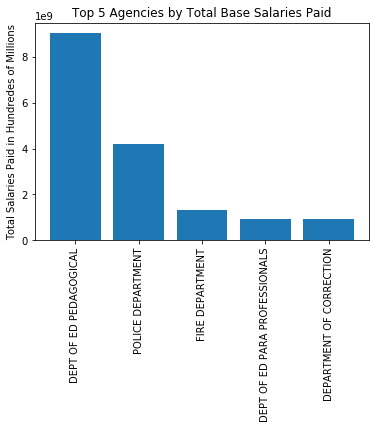

,Used Agency Name,Used Base Salary,Used Total OT Paid,Total Base and OT
70,DEPT OF ED PEDAGOGICAL,9.032051e+09,0.000000e+00,9.032051e+09
125,POLICE DEPARTMENT,4.204159e+09,7.670260e+08,4.971185e+09
89,FIRE DEPARTMENT,1.339017e+09,3.455322e+08,1.684550e+09
69,DEPT OF ED PARA PROFESSIONALS,9.362491e+08,1.772938e+06,9.380221e+08
60,DEPARTMENT OF CORRECTION,9.189778e+08,2.780812e+08,1.197059e+09
...,...,...,...,...
11,BRONX COMMUNITY BOARD #11,1.267145e+05,0.000000e+00,1.267145e+05
149,STATEN ISLAND COMMUNITY BD #2,9.235155e+04,0.000000e+00,9.235155e+04
4,BOARD OF ELECTION POLL WORKERS,3.905400e+04,0.000000e+00,3.905400e+04
124,PERSONNEL MONITORS,1.414825e+04,9.265850e+03,2.341410e+04


In [163]:
#plotting top base salaries paid peragencies 
base_top = group_payroll.sort_values(by=["Used Base Salary"], ascending=False)
x_axis = base_top["Used Agency Name"].head(5)
y_axis = base_top["Used Base Salary"].head(5)
plt.bar(x_axis, y_axis, align = "center")
plt.ylabel('Total Salaries Paid in Hundredes of Millions')
plt.xticks(x_axis, rotation = 90 )
plt.title("Top 5 Agencies by Total Base Salaries Paid")
plt.savefig("TopBaseSalaries.png")
plt.show()
base_top


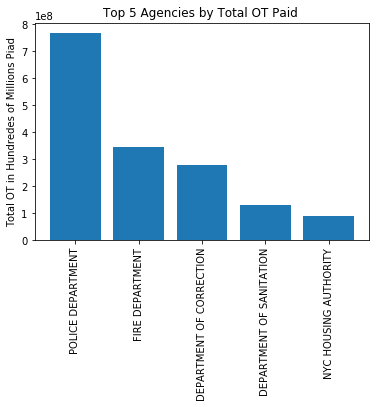

,Used Agency Name,OT Hours,Total OT Paid
125,POLICE DEPARTMENT,11776939.35,7.670260e+08
89,FIRE DEPARTMENT,5527322.99,3.455322e+08
60,DEPARTMENT OF CORRECTION,4794205.83,2.780812e+08
65,DEPARTMENT OF SANITATION,2484960.50,1.314224e+08
114,NYC HOUSING AUTHORITY,1868147.00,8.818753e+07


In [164]:
#plotting top total OT paid per agencies 
ot_total_top = group_ot.sort_values(by=["Total OT Paid"], ascending=False)
ot_total_top.head()

x_axis = OT_total_top["Used Agency Name"].head(5)
y_axis = OT_total_top["Total OT Paid"].head(5)
plt.bar(x_axis, y_axis, align = "center")
plt.ylabel('Total OT in Hundredes of Millions Piad')
plt.xticks(x_axis, rotation = 90)
plt.title("Top 5 Agencies by Total OT Paid ")
plt.savefig("../TopOTPaid.png")
plt.show()
ot_total_top.head()


,Used Agency Name,Used Base Salary,Used Total OT Paid,Total Base and OT
70,DEPT OF ED PEDAGOGICAL,9.032051e+09,0.000000e+00,9.032051e+09
125,POLICE DEPARTMENT,4.204159e+09,7.670260e+08,4.971185e+09
89,FIRE DEPARTMENT,1.339017e+09,3.455322e+08,1.684550e+09
60,DEPARTMENT OF CORRECTION,9.189778e+08,2.780812e+08,1.197059e+09
69,DEPT OF ED PARA PROFESSIONALS,9.362491e+08,1.772938e+06,9.380221e+08


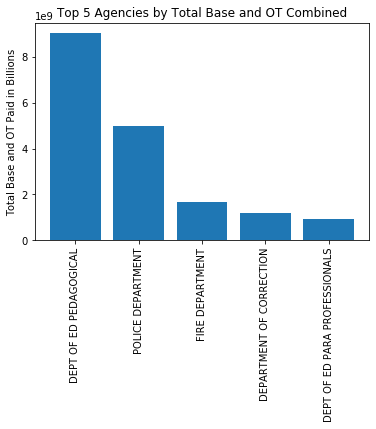

In [165]:
#plotting combined total OT paid and Base Salary
total_top = group_payroll.sort_values(by=["Total Base and OT"], ascending=False)
x_axis = total_top["Used Agency Name"].head(5)
y_axis = total_top["Total Base and OT"].head(5)
plt.bar(x_axis, y_axis, align = "center")
plt.ylabel('Total Base and OT Paid in Billions')
plt.title("Top 5 Agencies by Total Base and OT Combined")
plt.xticks(x_axis, rotation = 90)
plt.savefig("../TopTotalSalaries.png")
total_top.head()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

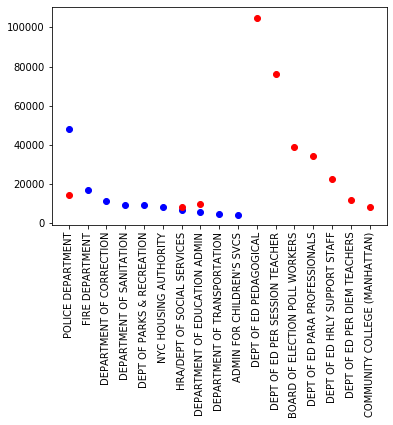

In [166]:
#Ratio of employees who use OT hours
#Total employees who have done OT hours / Total employees per agency 

ot_ratio_full_df = payroll_2017[["Used Agency Name","First Name","Last Name","OT Hours"]]
ot_ratio_yes_df = ot_ratio_full_df.loc[ot_ratio_full_df["OT Hours"] > 0]
ot_ratio_no_df = ot_ratio_full_df.loc[ot_ratio_full_df["OT Hours"] == 0]

summary_ot_yes = ot_ratio_yes_df.groupby(by='Used Agency Name').agg("count").reset_index()
summary_ot_no = ot_ratio_no_df.groupby(by='Used Agency Name').agg('count').reset_index()
summary_full = ot_ratio_full_df.groupby(by='Used Agency Name').agg('count').reset_index()

summary_ot_yes = summary_ot_yes.sort_values(by = "OT Hours", ascending = False).head(10)
summary_ot_no = summary_ot_no.sort_values(by = "OT Hours", ascending = False).head(10)

x_axis_yes = summary_ot_yes["Used Agency Name"]
y_axis_yes = summary_ot_yes["OT Hours"]


x_axis_no = summary_ot_no["Used Agency Name"]
y_axis_no = summary_ot_no["OT Hours"]


plt.scatter(x_axis_yes, y_axis_yes, color = "blue")
plt.scatter(x_axis_no, y_axis_no, color = "red")
plt.xticks(rotation = 90)


In [167]:
#ratio of overtime workers based on total employees within an agency
merged = summary_full.merge(summary_ot_yes, how='outer', on = "Used Agency Name")
merged ["ratio"] = merged["OT Hours_y"]/merged["OT Hours_x"]
merged = merged.sort_values(by = "ratio", ascending = False).head(10)
merged


,Used Agency Name,First Name_x,Last Name_x,OT Hours_x,First Name_y,Last Name_y,OT Hours_y,ratio
89,FIRE DEPARTMENT,18687,18687,18687,16828.0,16828.0,16828.0,0.900519
60,DEPARTMENT OF CORRECTION,14292,14292,14292,11285.0,11285.0,11285.0,0.789603
125,POLICE DEPARTMENT,62516,62516,62516,48108.0,48108.0,48108.0,0.769531
65,DEPARTMENT OF SANITATION,12599,12599,12599,9465.0,9465.0,9465.0,0.751250
66,DEPARTMENT OF TRANSPORTATION,6271,6271,6271,4629.0,4629.0,4629.0,0.738160
114,NYC HOUSING AUTHORITY,12798,12798,12798,8497.0,8497.0,8497.0,0.663932
76,DEPT OF PARKS & RECREATION,15702,15702,15702,9454.0,9454.0,9454.0,0.602089
0,ADMIN FOR CHILDREN'S SVCS,7344,7344,7344,4344.0,4344.0,4344.0,0.591503
92,HRA/DEPT OF SOCIAL SERVICES,14743,14743,14743,6596.0,6596.0,6596.0,0.447399
61,DEPARTMENT OF EDUCATION ADMIN,15623,15623,15623,5816.0,5816.0,5816.0,0.372272


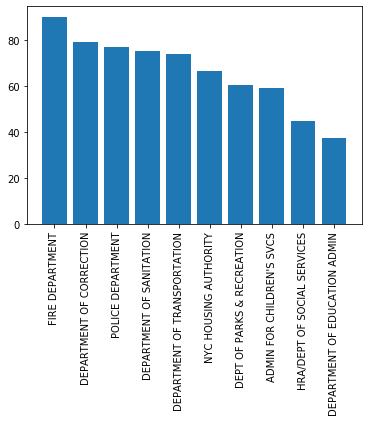

In [168]:
x_axis_ratio = merged["Used Agency Name"]
y_axis_ratio = merged["ratio"]*100


plt.bar(x_axis_ratio,y_axis_ratio)
plt.xticks(rotation = 90)

mta_ratio = merged.loc[merged["Used Agency Name"] == "DEPARTMENT OF TRANSPORTATION"]["ratio"]
police_ratio = merged.loc[merged["Used Agency Name"] == "POLICE DEPARTMENT"]["ratio"]

#plt.pie(mta_ratio)
#pie chart for MTA % 

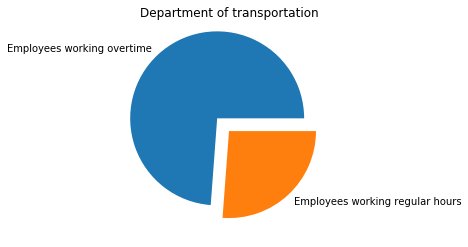

In [169]:
#Looking more into department of transportation 
mta_ratio = merged.loc[merged["Used Agency Name"] == "DEPARTMENT OF TRANSPORTATION"]
mta_ratio


x = 1- mta_ratio["ratio"][66]
y = mta_ratio["ratio"][66]
size = [y, x]
plt.pie(size , explode = (0.2,0), labels = ("Employees working overtime", "Employees working regular hours"))
plt.title("Department of transportation")
plt.savefig("Department of transportation")


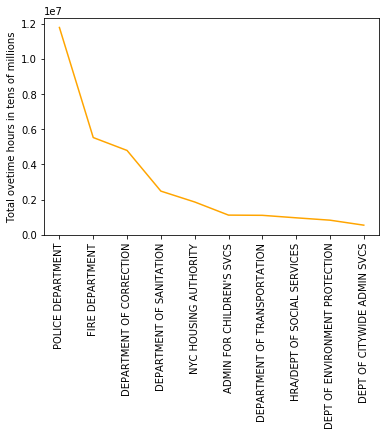

In [170]:
#top total overtime hours by agency

summary_ot_yes_hours = ot_ratio_yes_df.groupby(by='Used Agency Name').agg({"OT Hours":'sum'}).reset_index()
summary_ot_yes_hours =summary_ot_yes_hours.sort_values(by = "OT Hours", ascending = False).head(10)

x_axis_yes_hours = summary_ot_yes_hours["Used Agency Name"]
y_axis_yes_hours = summary_ot_yes_hours["OT Hours"]
plt.plot(x_axis_yes_hours, y_axis_yes_hours, color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Total ovetime hours in tens of millions")
plt.savefig("total overtime hours")

In [171]:
#by employee ratio ot paid and salary paid
salary_small["Ratio of OT"] = salary_small["Used Total OT Paid"] / salary_small["Used Base Salary"]


In [173]:
#removing hourly 
salary_small["Pay Basis"] = [x.strip() for x in payroll_2017["Pay Basis"]]
salary_small_annual = salary_small.loc[salary_small["Pay Basis"] == "per Annum"]
salary_small_annual.head()
salary_small_annual["OT ratio"] = salary_small_annual["Used Total OT Paid"]/salary_small_annual["Used Base Salary"]
salary_small_annual.loc[salary_small_annual["Used Agency Name"] =="DEPARTMENT OF TRANSPORTATION"].sort_values(by = "OT ratio", ascending = False).head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Used Agency Name,Last Name,First Name,Base Salary,Total OT Paid,Pay Basis,Used Base Salary,Used Total OT Paid,Total Base and OT,Ratio of OT,OT ratio
1772774,DEPARTMENT OF TRANSPORTATION,LADOUCEUR,JOSUE,$64231.00,$90733.52,per Annum,64231.0,90733.52,154964.52,1.412613,1.412613
1772709,DEPARTMENT OF TRANSPORTATION,KOTELEVICH,PAVEL,$68789.00,$96869.02,per Annum,68789.0,96869.02,165658.02,1.408205,1.408205
1772623,DEPARTMENT OF TRANSPORTATION,KERCADO,NELSON,$57161.00,$78078.93,per Annum,57161.0,78078.93,135239.93,1.365948,1.365948
1769967,DEPARTMENT OF TRANSPORTATION,AVERSANO,CLIFFORD,$68789.00,$90961.92,per Annum,68789.0,90961.92,159750.92,1.322332,1.322332
1775303,DEPARTMENT OF TRANSPORTATION,TETTONIS,MARK,$68789.00,$89177.76,per Annum,68789.0,89177.76,157966.76,1.296396,1.296396


In [174]:
#expected value of ot pay ratio within the department of transportation
dot = salary_small_annual.loc[salary_small_annual["Used Agency Name"] =="DEPARTMENT OF TRANSPORTATION"]
expected_value_dot = dot["OT ratio"].sum() / len(dot.index)

expected_value_dot

#conclusion is that a worker at the mta is expected to make %14.54 more than their base salary by doing overtime

0.14541134534055822

In [175]:
#expected value of ot pay ratio within the police department
police = salary_small_annual.loc[salary_small_annual["Used Agency Name"] =="POLICE DEPARTMENT"]
expected_value_police = police["OT ratio"].sum() / len(dot.index)

expected_value_police

#conclusion is that a worker at the police is expected to make %248.54 more than their base salary by doing overtime

2.482200936175437